## Домашнее задание 10. Метод штрафов. ADMM.
### Deadline -  22.11.2024   

## Вступление

Ранее мы частенько работали с ERM на основе логистической регрессии, однако, в данной домашней работе к рассмотрению будет предложена функция, лежащая в основне SVM (чисто ради разнообразия). Ставится следующая задача оптимизации:
$$
\begin{equation}
\min \limits_{w \in \mathbb{R}^d} \frac{1}{2} \| w \|^2 + C \sum \limits_{i = 1}^n \max \left(1 - y_i \cdot \langle X_i, w \rangle , 0 \right).
\end{equation}
$$
Член с суммой есть ни что иное, как *hinge_loss*, довольно популярная функция потерь при обучении классификаторов.

## Основная часть (10 баллов)

__a) (1 балл)__ Переформулируйте задачу (1) в задачу оптимизации с ограничениями. *Подсказка*: попробуйте представить слагаемое в сумме как $s_i = (Bw)_i + e_i$, где $B \in \mathbb{R}^{n \times d}$ -- некоторая матрица, а $e \in \mathbb{R}^n$ -- вектор, составленный из единиц. Для удобства обозначений также замените суммирование на функцию
$$
p(s) = \sum \limits_{i = 1}^n \max(s_i, 0).
$$

$$
    B = \begin{bmatrix} -y_1X_1 \\ -y_2X_2 \\ \vdots \\ -y_nX_n \end{bmatrix} \Rightarrow  
    \left\{
    \begin{aligned}
        \min\limits_{\omega \in \mathbb{R}^d, s \in \mathbb{R}^n} \; & \frac 12 \|\omega\|^2 + Cp(s) \\
                                                  \text {s.t.} \quad & e + B \omega = s 
    \end{aligned}
    \right.
$$

__б) (1.5 балла)__ Для полученной задачи оптимизации с ограничениями напишите функцию Лагранжа $L(w, s, \lambda)$. В качестве ограничений можно взять функцию $s$.


$$ \mathcal{L}(\omega, s, \lambda) = \frac 12 \|\omega\|^2 + Cp(s) + \lambda^T (e + B\omega - s) $$

__в) (0.5 балл)__ Запишите расширенный Лагранжиан задачи $L_{\rho}(w, s, \lambda)$, введя параметр $\rho$.

$$ \mathcal{L}_{\rho}(\omega, s, \lambda) = \frac 12 \|\omega\|^2 + Cp(s) + \lambda^T(e + B\omega - s) + \frac {\rho}{2} \|e + B\omega - s\|_2^2 $$

__г) (2 балла)__ Как вы помните из лекции, на шаге алгоритма ADMM мы решаем задачу минимизации расширенного Лагранжиана по параметру $s$:
$$
\varphi (w) = \min \limits_{s} L_{\rho} (w, s, \lambda).
$$
Переформулируйте задача минимизации так, чтобы члены с $w$ и $\lambda$ были вытащены из под $\min$. То есть вид должен быть такой:
$$
\varphi (w) = c_1 \|w\|^2 + c_2 \| \lambda\|^2 + c_3 \min \limits_{s} \left[\|s - t(w)\|^2 + c_4 p(s) \right].
$$
Здесь $t(w)$ -- функция, которая зависит только от переменной $w$.

$$\lambda^T(e + B\omega - s) + \frac{\rho}{2} \|e + B\omega - s\|_2^2 = 
\frac{\rho}{2}(\langle e + B\omega - s, e + B\omega - s \rangle + \langle 2\frac{\lambda}{\rho}, e + B\omega - s \rangle) = 
\frac{\rho}{2}(\langle e + B\omega - s + \frac{\lambda}{\rho}, e + B\omega - s + \frac {\lambda}{\rho} \rangle - \langle \frac{\lambda}{\rho}, \frac{\lambda}{\rho} \rangle) = 
\frac{\rho}{2}\|e + B\omega - s + \frac{\lambda}{\rho}\|^2 - \frac{\|\lambda\|^2}{2\rho}$$

$$\varphi(\omega) = 
\min\limits_s L_{\rho}(\omega, s, \lambda) = 
\min\limits_s (\frac 12 \|\omega\|^2 + Cp(s) + \lambda^T(e + B\omega - s) + \frac{\rho}{2} \|e + B\omega - s\|_2^2) =
\frac{\|\omega\|^2}2 + \min\limits_s(Cp(s) + \frac{\rho}{2}\|e + B\omega - s + \frac{\lambda}{\rho}\|^2 - \frac{\|\lambda\|^2}{2\rho}) = 
\frac{\|\omega\|^2}2 - \frac{\|\lambda\|^2}{2\rho} + \frac{\rho}{2}\min\limits_s(\|s - (e + B\omega + \frac{\lambda}{\rho})\|^2 + \frac{2C}{\rho}p(s))$$

__д) (2 балла)__ Вычислите градиент $\nabla \varphi (w)$ аналитически. Считайте, что в точке оптимума значение $s^* = s^*(w^*) = \text{Prox}_p^{\rho^{-1}} (t(w^*))$. Воспользовавшись знанием с предыдущих лекций, покажите, что 
$$
\left[ \text{Prox}_p^{\rho^{-1}}\left(z \right) \right]_i = \begin{cases} z_i - \frac{C}{\rho}, & z_i > \frac{C}{\rho},\\ 0, & 0 \leq z_i \leq \frac{C}{\rho}, \\ z_i, & z_i < 0. \end{cases}
$$

$$d\varphi(\omega) = 
\omega^Td\omega + \rho (s^* - t(\omega))^T d(s^* - t(\omega)) = 
\omega^Td\omega - \rho(s^* - t(\omega))^TBd\omega = 
\langle\omega - \rho B^T (s^* - t(\omega)), d\omega \rangle$$

$$\nabla \varphi(\omega) = 
\omega - \rho B^T(s^* - t(\omega)) = 
\omega - \rho B^T(s^* - e - B\omega - \frac {\lambda}{\rho})$$
  
$$\text{Prox}_r(x) = y \Leftrightarrow x - y \in \partial r(y) \Rightarrow [\partial p(s)]_i = 
\begin{cases} 0, & s_i < 0 \\ [0, 1], & s_i = 0 \\ 1, & s_i > 0 \end{cases}
\Rightarrow [z-\text{Prox}_p^{\rho^{-1}}(z)]_i \in 
\begin{cases} 0, & y_i < 0 \\ [0, \frac{C}{\rho}], & y_i = 0 \\ \frac{C}{\rho}, & y_i > 0 \end{cases}
\Rightarrow \left[ \text{Prox}_p^{\rho^{-1}}(z) \right]_i = 
\begin{cases} z_i, & z_i < 0 \\ 0, & z_i \in [0, \frac{C}{\rho}] \\ z_i - \frac{C}{\rho}, & z_i > \frac{C}{\rho} \end{cases}$$ 

__е) (3 балла)__ Напомним основные итерации ADMM на $k$-ой итерации:
1. Вычислить новые значения $w^{k + 1}$ и $s^{k + 1}$ при решении задачи минимизации $\min \varphi (w)$:
$$w^* = \arg\min \varphi (w); \qquad s^* = s^*(w^*) = \text{Prox}_p^{\rho^{-1}} (t(w^*))$$
2. Обновить параметр $\lambda^{k + 1}$ по теории (_покажите это!_):
   $$\lambda^{k + 1} = \lambda^{k} - \rho (s - Bw - e).$$ 

Реализуйте метод ```ADMM``` для решения задачи оптимизации ```hinge_loss```, проверьте сходимости при разных значениях коэффициента $C$. Рассмотрите следующие значения: [1e-10, 1e-8, 1e-6]. Параметр $\rho$ положите равным 1. Критерием останова будет являться норма градиента функции $\phi$ в новой точке.

$$\nabla \varphi(\omega^*) = \omega^* - \rho B^T(s^* - e - B\omega^* - \frac{\lambda}{\rho}) = 0
\Leftrightarrow \omega^* = (\rho B^TB + I_m)^{-1}\rho B^T(s^* - e - \frac{\lambda}{\rho}),$$
где $m$ - количество параметров.

$$\lambda^{k+1} = \lambda^k - \rho(s^{k+1} - e - B\omega^{k+1})$$

In [1]:
import numpy as np


def get_funcs(X, y, C, r, make_grad):
    B = -X * y.reshape(-1, 1)

    def t(w, l):
        return 1 + B @ w + l / r

    def prox(z):
        return np.minimum(np.maximum(z - C / r, 0), z)

    def grad(w, s, l):
        return w - r * B.T @ (s - t(w, l))

    def opt_w(w, s, l):
        if make_grad:
            return w - grad(w, s, l)
        return np.linalg.inv(r * B.T @ B + np.eye(X.shape[1])) @ B.T * r @ (s - t(w, l))

    def opt_s(w, s, l):
        return prox(1 + B @ w + l / r)

    def opt_l(w, s, l):
        return l - r * (s - 1 - B @ w)

    def criterion(w, s, l):
        return np.linalg.norm(grad(w, s, l))

    return opt_w, opt_s, opt_l, criterion

In [2]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

sns.set_theme(palette='Set2', rc={'figure.figsize': (16, 9)})
matplotlib.rcParams['figure.figsize'] = (16, 9)


def make_plot(xlabex: str, ylabel: str, title: str = "Plot", xlim: list = None, ylim: list = None, **kwargs) -> (
        plt.figure, plt.axis):
    """
    Creates a plot with the following parameters
    
    :param xlabex: x-axis label
    :param ylabel: y-axis label
    :param title: plot title
    :param xlim: x-limits
    :param ylim: y-limits
    """
    fig_, axs_ = plt.subplots(**kwargs)

    axs_.set_xlabel(xlabex)
    axs_.set_ylabel(ylabel)
    axs_.set_title(title)

    if xlim is not None:
        axs_.set_xlim(xlim)
    if ylim is not None:
        axs_.set_ylim(ylim)

    return fig_, axs_

In [3]:
dataset = "mushrooms.txt"

from sklearn.datasets import load_svmlight_file

data = load_svmlight_file(dataset)
X, y = data[0].toarray(), data[1] * 2 - 3

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=57)

In [4]:
from tqdm import trange


def ADMM(opt_x, opt_y, opt_l, criterion, x_0, y_0, l_0, eps, max_iter):
    x_k = np.copy(x_0)
    y_k = np.copy(y_0)
    l_k = np.copy(l_0)

    ans_x = np.copy(x_k)
    ans_y = np.copy(y_k)
    ans_l = np.copy(l_k)

    errors = []
    err_0 = criterion(x_k, y_k, l_k)
    errors.append(criterion(x_k, y_k, l_k) / err_0)

    k = 1
    for k in trange(max_iter + 1):
        x_k = opt_x(x_k, y_k, l_k)
        y_k = opt_y(x_k, y_k, l_k)
        l_k = opt_l(x_k, y_k, l_k)

        ans_x += x_k
        ans_y += y_k
        ans_l += l_k

        errors.append(criterion(x_k, y_k, l_k) / err_0)
        if errors[-1] < eps:
            break

    ans_x /= k
    ans_y /= k
    ans_l /= k
    return (ans_x, ans_y, ans_l), errors

In [12]:
R = 1
EPS = 1e-16
MAX_ITER = 10
w_0 = np.zeros((X_train.shape[1], 1))
s_0 = np.zeros((X_train.shape[0], 1))
l_0 = np.zeros((X_train.shape[0], 1))


def test(make_grad):
    axs = make_plot("Iteration", "Error", "ADMM Convergence")[1]
    axs.set_yscale("log")

    for C in [1e-10, 1e-8, 1e-6]:
        opt_w, opt_s, cond, crit = get_funcs(X_train, y_train, C, R, make_grad)
        _, errors = ADMM(opt_w, opt_s, cond, crit, w_0, s_0, l_0, EPS, MAX_ITER)
        sns.lineplot(x=np.arange(0, len(errors)), y=errors, ax=axs, label=f"C = {C}")
    plt.show()

100%|██████████| 11/11 [00:00<00:00, 128.38it/s]


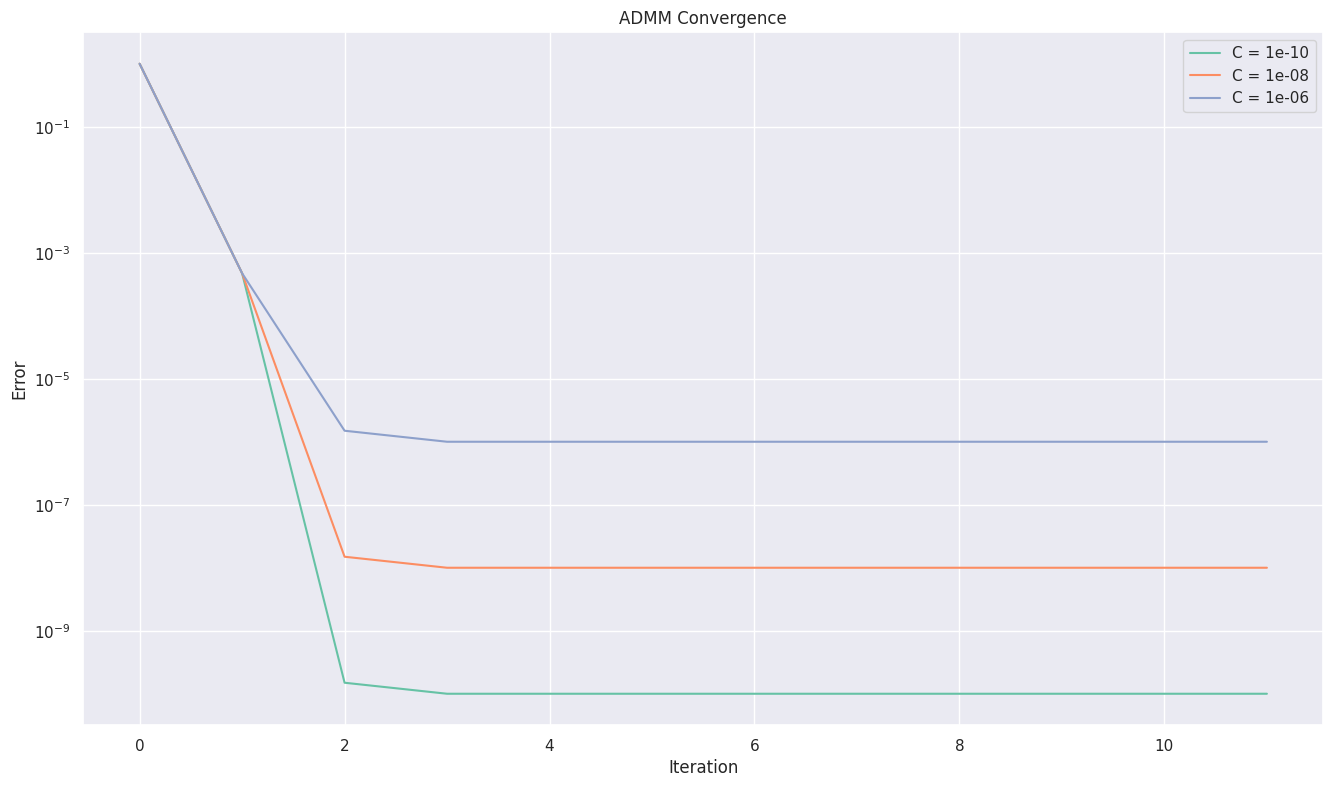

In [13]:
test(False)

 Как мы видим, в зависимости от $C$ итоговое значение ошибки убывает пропорционально. То есть, чем меньше значение гиперпараметра, управляющего балансом между регуляризацией и ошибкий, тем меньше итоговое значение ошибки и стремится уже на второй итерации к значению этого самого $C$, при этом потом не уменьшаясь. Попробуем использовать градиентный спуск, чтобы попробовать получить сходимость лучше

 36%|███▋      | 4/11 [00:00<00:00, 25.07it/s]


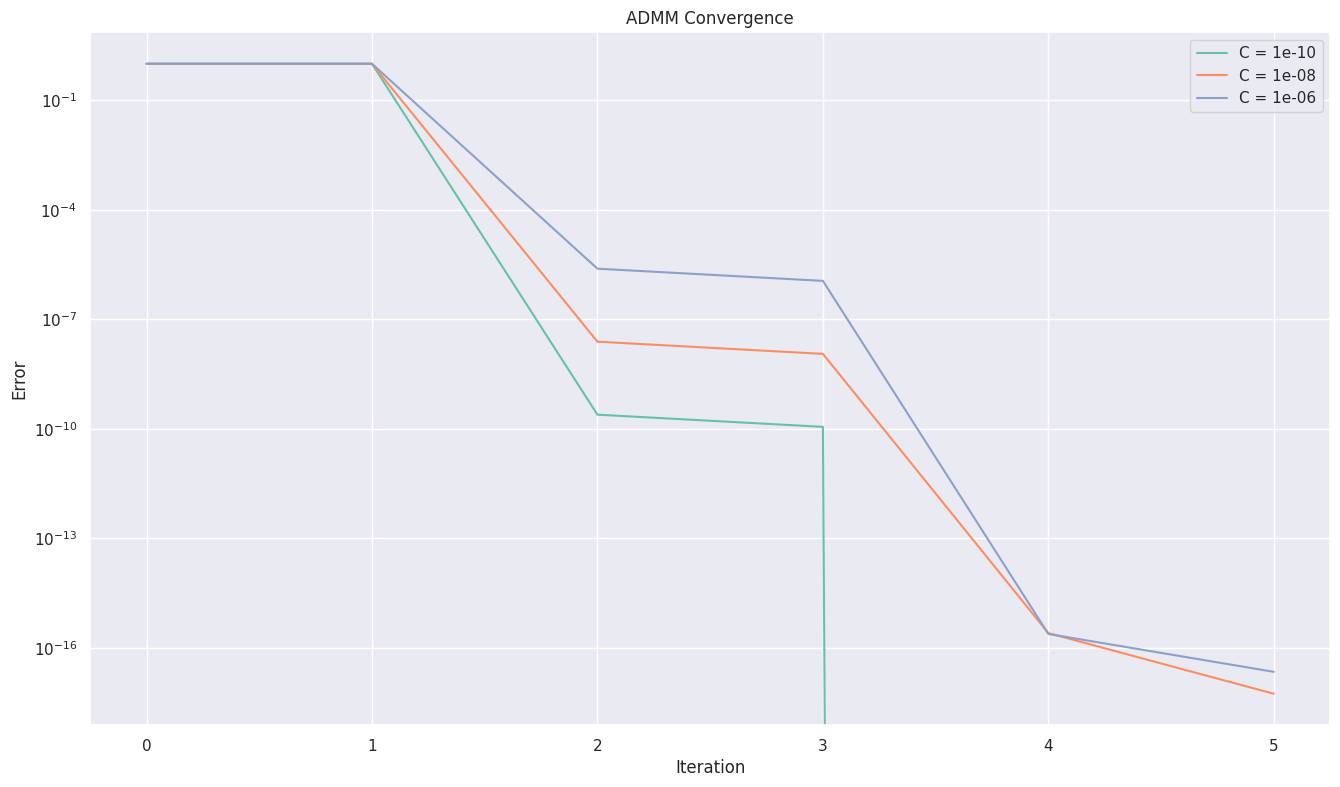

In [7]:
test(True)

Сильно лучше. Теперь мы видим, что алгоритм наконец действительно сходится, причем для малого параметра баланса это происходит всего за 3 итерации практически в 0. Для параметров $10^{-8}$ и $10^{-6}$ особой разницы по качеству не наблюдается.

## Дополнительная часть (всего 10 баллов)

__а) (3 балла)__ На лекции был использован метод первого порядка в качестве спуска по переменным. Однако, такой метод проигрывает по итеративной сложности методу Ньютона... Но функция-то в нашем случае не дважды диффиренцируема. Значит нужно рассматривать суб-гессиан. Найдите второй суб-дифференциал $\partial ^2 \varphi(w)$.

(*Указание:* возьмите честно второй раз дифференциал от формулы из пункта __д)__, используя градиент в тех местах, когда это возможно).

In [8]:
# Ваше решение (Markdown)

__б) (7 баллов)__ Запишем теперь [полугладкий метод Ньютона](https://www.polyu.edu.hk/ama/profile/dfsun/A%20QUADRATICALLY%20CONVERGENT%20NEWTON%20METHOD%20FOR_published.pdf) для поиска аргмина. Так как мы не умеем вычислять точно гессиан оптимизируемой функции, то прибегнем к методу сопряженных градиентов для подсчета направления спуска. На $k$-ой итерации:
1. Выбрать элемент $V_k \in \partial^2 \varphi(w^k)$.
2. Выполнить процедуру сопряженного градиента для поиска аппроксимации решения $d^k$ уравнения
$$
V_k d^k + \nabla \varphi(w^k) = 0.
$$
3. При помощи линейного поиска, как в методе BFGS находим параметр $\alpha^k$ и делаем обновление переменной:
$$w^{k + 1} = w^k + \alpha_k d^k.$$

Теперь, мы наконец-то готовы все собрать в один метод ADMM. На $k$-ой итерации
1. Вычислить новые значения $w^{k + 1}$ используя полугладкий метод Ньютона.
2. Обновить $s^{k + 1} = \text{Prox}_{p}^{\rho^{-1}} (w^{k + 1})$.
3. Обновить параметр $\lambda^{k + 1}$ по теории.

Реализуйте метод ```ADMM_SemiSmoothNewton``` и постройте график зависимости критерия от итерации. Поиграйте со значениями параметров, постройте сравнительные графики.

In [9]:
# Ваше решение (Code)

# Интересно почитать

Казалось бы, метод ADMM выглядит более громоздко, нежели привычные методы оптимизации без ограничений (SGD, NAG, DNM и другие), однако, на практике у него довольно много применений. Если вас заинтересовала возможность узнать больше о практических применения, рекоммендуется к прочтению [статья](https://web.stanford.edu/~boyd/papers/pdf/admm_distr_stats.pdf#page=64.25) от одного из столпов оптимизации Бойда. В ней рассматривается distributed подход (с множеством вычислительных единиц) к использованию метода ADMM при решении выпуклых задач оптимизации в машинном обучении и не только.   